This notebook is for classification on the relative risk dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(1, '../scripts/')
from utils import *
from processing import *
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# Loading Data

In [2]:
lead = 0
obs = 1

In [3]:
# Relative Risk with PTS
data = pd.read_csv("../csv/relative_{}hr_lead_{}hr_obs_data/relative_{}hr_lead_{}hr_obs_dataset_no_pts.csv".format(lead, obs, lead, obs), low_memory=False)
data

,PatientStayID,Class,LOS,Age,APACHEIVscore,APACHEIVaScore,UrgentAdmission,AdmissionCategory,NumBeds,TeachingStatus,...,comorbidity_alcohol,comorbidity_drug,comorbidity_depre,last_24hr_urine,tranfuse_rbc,tranfuse_plasma,tranfuse_platelet,dialysis,surgical,mv_duration
0,150934,1,826.0,69.0,78.0,78.0,1.0,4.0,2.0,0,...,0.0,0.0,0.0,NaN,0,0,0,1,0,0.0
1,151708,1,2007.0,79.0,38.0,38.0,1.0,4.0,4.0,1,...,0.0,0.0,0.0,300.0,0,0,0,0,0,0.0
2,152171,1,2380.0,84.0,38.0,38.0,0.0,4.0,2.0,0,...,0.0,0.0,0.0,NaN,0,0,0,0,1,0.0
3,155126,1,3521.0,71.0,65.0,65.0,0.0,4.0,4.0,1,...,0.0,0.0,0.0,NaN,1,0,0,0,1,477.0
4,156970,1,17999.0,56.0,32.0,32.0,1.0,4.0,4.0,1,...,1.0,0.0,0.0,1870.0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22373,3352487,0,720.0,60.0,45.0,45.0,0.0,4.0,4.0,0,...,NaN,NaN,NaN,2470.0,0,0,0,0,1,0.0
22374,3352563,0,923.0,34.0,54.0,54.0,1.0,4.0,2.0,0,...,0.0,0.0,0.0,1555.0,0,0,0,0,0,0.0
22375,3352747,0,1006.0,30.0,31.0,31.0,1.0,4.0,4.0,0,...,0.0,0.0,0.0,2700.0,0,0,0,0,0,0.0
22376,3353044,0,3398.0,52.0,41.0,41.0,1.0,4.0,2.0,0,...,0.0,0.0,0.0,2095.0,0,0,0,0,0,0.0


In [4]:
np.sum(data["Class"] == 0)

18587

In [5]:
for col in data.columns:
    print(col)
    print(missing_data(data, col))

PatientStayID
(0, 22378)
Class
(0, 22378)
LOS
(0, 22378)
Age
(1, 22378)
APACHEIVscore
(2646, 22378)
APACHEIVaScore
(2646, 22378)
UrgentAdmission
(630, 22378)
AdmissionCategory
(630, 22378)
NumBeds
(2300, 22378)
TeachingStatus
(0, 22378)
Gender
(1, 22378)
AdmitHeight
(0, 22378)
AdmitTime24
(0, 22378)
AdmitSource
(3834, 22378)
UnitType
(0, 22378)
UnitAdmitTime
(0, 22378)
UnitAdmitSource
(57, 22378)
AdmitWeight
(0, 22378)
HistAICD
(0, 22378)
HistAngina
(0, 22378)
HistArrythmia
(0, 22378)
HistCHF
(0, 22378)
HistCABG
(0, 22378)
HistHypertension
(0, 22378)
HistMI
(0, 22378)
HistPacemaker
(0, 22378)
HistPVD
(0, 22378)
HistPCI
(0, 22378)
HistPulmEmb
(0, 22378)
HistHeartTransp
(0, 22378)
HistValveDis
(0, 22378)
HistVenThromb
(0, 22378)
HistCushing
(0, 22378)
HistHypercalcemia
(0, 22378)
Histhyperthyroid
(0, 22378)
Histhypothyroid
(0, 22378)
Histdiabetes
(0, 22378)
HistSteroid Use
(0, 22378)
HistCirrhosis
(0, 22378)
HistHypersplenism
(0, 22378)
HistPUD
(0, 22378)
HistLiverTransp
(0, 22378)
HistA

In [6]:
data = process_all(data)
data["mv_duration_ratio"] = data["mv_duration"]/data["LOS"]
data

,PatientStayID,Class,LOS,Age,APACHEIVscore,APACHEIVaScore,UrgentAdmission,NumBeds,TeachingStatus,Gender,...,UnitAdmitSource_Floor,UnitAdmitSource_ICU,UnitAdmitSource_Missing,UnitAdmitSource_OR,UnitAdmitSource_Other,UnitAdmitSource_OtherHospital,UnitAdmitSource_PACU,UnitAdmitSource_SDU,TimeOfDay,mv_duration_ratio
0,150934,1,826.0,69.0,78.0,78.0,1.0,2.0,0,1.0,...,0,0,0,0,0,0,0,0,6060.0,0.000000
1,151708,1,2007.0,79.0,38.0,38.0,1.0,4.0,1,0.0,...,0,0,0,0,0,0,0,0,13680.0,0.000000
2,152171,1,2380.0,84.0,38.0,38.0,0.0,2.0,0,1.0,...,0,0,0,1,0,0,0,0,25320.0,0.000000
3,155126,1,3521.0,71.0,65.0,65.0,0.0,4.0,1,0.0,...,0,0,0,1,0,0,0,0,79860.0,0.135473
4,156970,1,17999.0,56.0,32.0,32.0,1.0,4.0,1,0.0,...,0,0,0,0,0,0,0,0,28620.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22373,3352487,0,720.0,60.0,45.0,45.0,0.0,4.0,0,1.0,...,0,0,0,0,0,0,1,0,48780.0,0.000000
22374,3352563,0,923.0,34.0,54.0,54.0,1.0,2.0,0,1.0,...,0,0,0,0,0,0,0,0,540.0,0.000000
22375,3352747,0,1006.0,30.0,31.0,31.0,1.0,4.0,0,0.0,...,0,0,0,0,0,0,0,0,32400.0,0.000000
22376,3353044,0,3398.0,52.0,41.0,41.0,1.0,2.0,0,0.0,...,1,0,0,0,0,0,0,0,22620.0,0.000000


In [7]:
for col in data.columns:
    print(col)

PatientStayID
Class
LOS
Age
APACHEIVscore
APACHEIVaScore
UrgentAdmission
NumBeds
TeachingStatus
Gender
AdmitHeight
AdmitWeight
HistAICD
HistAngina
HistArrythmia
HistCHF
HistCABG
HistHypertension
HistMI
HistPacemaker
HistPVD
HistPCI
HistPulmEmb
HistHeartTransp
HistValveDis
HistVenThromb
HistCushing
HistHypercalcemia
Histhyperthyroid
Histhypothyroid
Histdiabetes
HistSteroid Use
HistCirrhosis
HistHypersplenism
HistPUD
HistLiverTransp
HistAplasticAnemia
HistChemotherapy
HistRadiationTherapy
HistCancer
HistClottingDisorder
HistHemolyticAnemia
HistHypercoagulableCondition
HistOncology
HistMyeloproliferativeDisease
HistSickleCellDisease
HistImmuneSuppr
HistDementia
HistIntracranialMass
HistNeuromuscularDis
HistSeizures
HistStrokes
HistTIA
HistAsthma
HistCOPD
HistRespiratoryFail
HistRestrictiveDis
HistLungTransp
HistSarcoidosis
HistStoneDisease
HistNeurogenicBladd
HistRenalFail
HistRenalInsuff
HistRTA
HistRenalTransp
HistRheumatic
relative_0hr_lead_1hr_obsAcetaminophen
relative_0hr_lead_1hr_ob

In [8]:
for col in data.columns:
    if missing_data(data, col)[0] > 0.2*missing_data(data,col)[1]:
        data.drop(labels=[col], axis=1, inplace=True)
        #print(col)
#data.to_csv("../csv/relative_1hr_lead_1hr_obs_data/relative_1hr_lead_1hr_obs_dataset_no_pts_pre_rf.csv", index=False)
data

,PatientStayID,Class,LOS,Age,APACHEIVscore,APACHEIVaScore,UrgentAdmission,NumBeds,TeachingStatus,Gender,...,UnitAdmitSource_Floor,UnitAdmitSource_ICU,UnitAdmitSource_Missing,UnitAdmitSource_OR,UnitAdmitSource_Other,UnitAdmitSource_OtherHospital,UnitAdmitSource_PACU,UnitAdmitSource_SDU,TimeOfDay,mv_duration_ratio
0,150934,1,826.0,69.0,78.0,78.0,1.0,2.0,0,1.0,...,0,0,0,0,0,0,0,0,6060.0,0.000000
1,151708,1,2007.0,79.0,38.0,38.0,1.0,4.0,1,0.0,...,0,0,0,0,0,0,0,0,13680.0,0.000000
2,152171,1,2380.0,84.0,38.0,38.0,0.0,2.0,0,1.0,...,0,0,0,1,0,0,0,0,25320.0,0.000000
3,155126,1,3521.0,71.0,65.0,65.0,0.0,4.0,1,0.0,...,0,0,0,1,0,0,0,0,79860.0,0.135473
4,156970,1,17999.0,56.0,32.0,32.0,1.0,4.0,1,0.0,...,0,0,0,0,0,0,0,0,28620.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22373,3352487,0,720.0,60.0,45.0,45.0,0.0,4.0,0,1.0,...,0,0,0,0,0,0,1,0,48780.0,0.000000
22374,3352563,0,923.0,34.0,54.0,54.0,1.0,2.0,0,1.0,...,0,0,0,0,0,0,0,0,540.0,0.000000
22375,3352747,0,1006.0,30.0,31.0,31.0,1.0,4.0,0,0.0,...,0,0,0,0,0,0,0,0,32400.0,0.000000
22376,3353044,0,3398.0,52.0,41.0,41.0,1.0,2.0,0,0.0,...,1,0,0,0,0,0,0,0,22620.0,0.000000


In [9]:

common_imputation= ["Gender", "UrgentAdmission", "TeachingStatus"]
for col in data.columns:
    if col.startswith("comorbidity_") or col.startswith("Hist"):
        common_imputation.append(col)
one_hot_removal = []
remove = ["APACHEIVaScore", "relative_{}hr_lead_{}hr_obsHaloperidol".format(lead, obs), "relative_{}hr_lead_{}hr_obsPrecedex".format(lead, obs), "ventilator", "UnitAdmitSource_Missing", "vasopressors"]#, "mean_motor_GCS", 

exceptions = []# ["UrgentAdmission"]

mean_imputation = data.columns
mean_imputation = mean_imputation.drop(common_imputation)
mean_imputation = mean_imputation.drop(one_hot_removal)
mean_imputation = mean_imputation.drop(remove)
mean_imputation = mean_imputation.drop(exceptions)
mean_imputation = mean_imputation.tolist()

In [10]:
for col in data.columns:
    if col.startswith("count_"):
        data[col] = data[col].fillna(0)
    if col.startswith("diff_"):
        data[col] = data[col].fillna(0)


from sklearn.impute import SimpleImputer
data.drop(remove, axis=1, inplace = True)
imp_mean = SimpleImputer(strategy='mean')
data[mean_imputation] = imp_mean.fit_transform(data[mean_imputation])
imp_freq = SimpleImputer(strategy='most_frequent')
data[common_imputation] = imp_freq.fit_transform(data[common_imputation])
data[one_hot_removal] = data[one_hot_removal].replace(1, np.NaN)

In [11]:
data.dropna(inplace = True)
labels = data['Class']
data.drop(['Class'], axis=1, inplace=True)
print(len(data.index))
data

22378


,PatientStayID,LOS,Age,APACHEIVscore,UrgentAdmission,NumBeds,TeachingStatus,Gender,AdmitHeight,AdmitWeight,...,UnitAdmitSource_EmergencyDep,UnitAdmitSource_Floor,UnitAdmitSource_ICU,UnitAdmitSource_OR,UnitAdmitSource_Other,UnitAdmitSource_OtherHospital,UnitAdmitSource_PACU,UnitAdmitSource_SDU,TimeOfDay,mv_duration_ratio
0,150934.0,826.0,69.0,78.0,1.0,2.0,0.0,1.0,152.4,74.800000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6060.0,0.000000
1,151708.0,2007.0,79.0,38.0,1.0,4.0,1.0,0.0,175.3,70.800000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13680.0,0.000000
2,152171.0,2380.0,84.0,38.0,0.0,2.0,0.0,1.0,165.1,84.184547,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25320.0,0.000000
3,155126.0,3521.0,71.0,65.0,0.0,4.0,1.0,0.0,165.1,83.200000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,79860.0,0.135473
4,156970.0,17999.0,56.0,32.0,1.0,4.0,1.0,0.0,167.6,90.500000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28620.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22373,3352487.0,720.0,60.0,45.0,0.0,4.0,0.0,1.0,168.0,118.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,48780.0,0.000000
22374,3352563.0,923.0,34.0,54.0,1.0,2.0,0.0,1.0,172.7,81.600000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540.0,0.000000
22375,3352747.0,1006.0,30.0,31.0,1.0,4.0,0.0,0.0,167.6,62.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32400.0,0.000000
22376,3353044.0,3398.0,52.0,41.0,1.0,2.0,0.0,0.0,175.0,52.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,22620.0,0.000000


In [12]:
from sklearn import preprocessing

standard_data = data.copy()
scaler = preprocessing.StandardScaler()
standard_data.iloc[:,1:] = scaler.fit_transform(data.iloc[:,1:])
standard_data

,PatientStayID,LOS,Age,APACHEIVscore,UrgentAdmission,NumBeds,TeachingStatus,Gender,AdmitHeight,AdmitWeight,...,UnitAdmitSource_EmergencyDep,UnitAdmitSource_Floor,UnitAdmitSource_ICU,UnitAdmitSource_OR,UnitAdmitSource_Other,UnitAdmitSource_OtherHospital,UnitAdmitSource_PACU,UnitAdmitSource_SDU,TimeOfDay,mv_duration_ratio
0,150934.0,-0.444068,0.347442,0.923908,0.397545,-1.619626,-0.739263,1.052215,-1.010228,-3.460025e-01,...,0.988448,-0.456416,-0.143416,-0.301614,-0.034756,-0.185704,-0.277403,-0.232539,-1.377734,-0.470927
1,151708.0,-0.109732,0.943064,-0.778397,0.397545,0.884906,1.352698,-0.950376,0.398105,-4.934801e-01,...,-1.011687,-0.456416,-0.143416,-0.301614,-0.034756,-0.185704,-0.277403,-0.232539,-1.079301,-0.470927
2,152171.0,-0.004137,1.240875,-0.778397,-2.515440,-1.619626,-0.739263,1.052215,-0.229188,5.239455e-16,...,-1.011687,-0.456416,-0.143416,3.315494,-0.034756,-0.185704,-0.277403,-0.232539,-0.623429,-0.470927
3,155126.0,0.318876,0.466566,0.370659,-2.515440,0.884906,1.352698,-0.950376,-0.229188,-3.629964e-02,...,-1.011687,-0.456416,-0.143416,3.315494,-0.034756,-0.185704,-0.277403,-0.232539,1.512593,-0.002854
4,156970.0,4.417540,-0.426866,-1.033743,0.397545,0.884906,1.352698,-0.950376,-0.075440,2.328469e-01,...,0.988448,-0.456416,-0.143416,-0.301614,-0.034756,-0.185704,-0.277403,-0.232539,-0.494187,-0.470927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22373,3352487.0,-0.474076,-0.188618,-0.480494,-2.515440,0.884906,-0.739263,1.052215,-0.050840,1.268877e+00,...,-1.011687,-0.456416,-0.143416,-0.301614,-0.034756,-0.185704,3.604857,-0.232539,0.295366,-0.470927
22374,3352563.0,-0.416608,-1.737234,-0.097475,0.397545,-1.619626,-0.739263,1.052215,0.238207,-9.529066e-02,...,0.988448,-0.456416,-0.143416,-0.301614,-0.034756,-0.185704,-0.277403,-0.232539,-1.593921,-0.470927
22375,3352747.0,-0.393111,-1.975483,-1.076301,0.397545,0.884906,-0.739263,-0.950376,-0.075440,-7.958091e-01,...,-1.011687,-0.456416,-0.143416,-0.301614,-0.034756,-0.185704,-0.277403,-0.232539,-0.346145,-0.470927
22376,3353044.0,0.284055,-0.665115,-0.650724,0.397545,-1.619626,-0.739263,-0.950376,0.379655,-1.186625e+00,...,-1.011687,2.190985,-0.143416,-0.301614,-0.034756,-0.185704,-0.277403,-0.232539,-0.729172,-0.470927


In [13]:
for col in data.columns:
    print(col)

PatientStayID
LOS
Age
APACHEIVscore
UrgentAdmission
NumBeds
TeachingStatus
Gender
AdmitHeight
AdmitWeight
HistAICD
HistAngina
HistArrythmia
HistCHF
HistCABG
HistHypertension
HistMI
HistPacemaker
HistPVD
HistPCI
HistPulmEmb
HistHeartTransp
HistValveDis
HistVenThromb
HistCushing
HistHypercalcemia
Histhyperthyroid
Histhypothyroid
Histdiabetes
HistSteroid Use
HistCirrhosis
HistHypersplenism
HistPUD
HistLiverTransp
HistAplasticAnemia
HistChemotherapy
HistRadiationTherapy
HistCancer
HistClottingDisorder
HistHemolyticAnemia
HistHypercoagulableCondition
HistOncology
HistMyeloproliferativeDisease
HistSickleCellDisease
HistImmuneSuppr
HistDementia
HistIntracranialMass
HistNeuromuscularDis
HistSeizures
HistStrokes
HistTIA
HistAsthma
HistCOPD
HistRespiratoryFail
HistRestrictiveDis
HistLungTransp
HistSarcoidosis
HistStoneDisease
HistNeurogenicBladd
HistRenalFail
HistRenalInsuff
HistRTA
HistRenalTransp
HistRheumatic
relative_0hr_lead_1hr_obsAcetaminophen
relative_0hr_lead_1hr_obsAdrenergicBronchodil

In [14]:
pr_baseline = np.sum(labels[labels==1])/len(labels)

with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned/pr_baseline".format(lead, obs), "wb") as f:
    pickle.dump(pr_baseline, f)

# Visualize Data

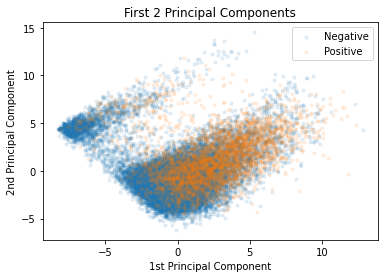

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(standard_data.iloc[:,1:])
plt.figure()
plt.scatter(pca_data[labels==0][:, 0], pca_data[labels==0][:, 1], alpha = 0.1, marker='.')
plt.scatter(pca_data[labels==1][:, 0], pca_data[labels==1][:, 1], alpha=0.1, marker='.')
plt.legend(["Negative", "Positive"])
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("First 2 Principal Components")
plt.show()

In [20]:
positive = data[labels==1]
negative = data[labels==0]

In [21]:
print(np.mean(positive["mv_duration"]))
print(np.mean(negative["mv_duration"]))

1630.2901609074122
366.8242319901006


In [ ]:

plt.figure()
plt.boxplot([np.asarray(positive[positive["mv_duration"] != -0]["mv_duration"])/60, np.asarray(negative[negative["mv_duration"] != -0]["mv_duration"])/60], widths = 0.75, showfliers=False)
plt.xticks([1, 2], ["Delirium", "No Delirium"])
plt.show()

In [ ]:

plt.figure()
plt.boxplot([np.asarray(positive[positive["mv_duration_ratio"] != -1]["mv_duration_ratio"]), np.asarray(negative[negative["mv_duration_ratio"] != -1]["mv_duration_ratio"])], widths = 0.75, showfliers=False)
plt.xticks([1, 2], ["Delirium", "No Delirium"])
plt.show()

In [ ]:
plt.figure()
plt.scatter(positive[positive["mv_duration"] != 0]["LOS"], positive[positive["mv_duration"] != 0]["mv_duration"])
plt.plot([0, 60000], [0, 60000], 'r--')
plt.xlabel("Length of Stay")
plt.ylabel("Length of MV")
plt.title("Positive Patients")
plt.show()

plt.figure()
plt.scatter(negative[negative["mv_duration"] != 0]["LOS"], negative[negative["mv_duration"] != 0]["mv_duration"])
plt.plot([0, 60000], [0, 60000], 'r--')
plt.xlabel("Length of Stay")
plt.ylabel("Length of MV")
plt.title("Negative Patients")
plt.show()

In [ ]:
negative[negative["mv_duration_ratio"] > 1].loc[:, ["PatientStayID", "LOS", "mv_duration"]]

In [ ]:
np.max(negative["mv_duration_ratio"])

# Logistic Regression

In [22]:
lr_calibrated = run_cross_validation(standard_data, "LogisticRegression", {"penalty" : ['l1'], "max_iter" : [100], "class_weight" : ["balanced"], "C" : [0.01, 0.015, 0.02], "solver" : ["liblinear"]}, "from sklearn.linear_model import LogisticRegression", run_once = False, bayes=False, dataset="/relative_1hr_lead_1hr_obs_data/relative_1hr_lead_1hr_obs", calibrate=True, outer_tuning=True, outer_labels=labels)

Fold 0:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 1:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 2:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 3:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


C:\Users\Ryan\Anaconda3\envs\pcm\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Outer:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [23]:
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned/lr".format(lead, obs), "wb") as f:
    pickle.dump(lr_calibrated, f)

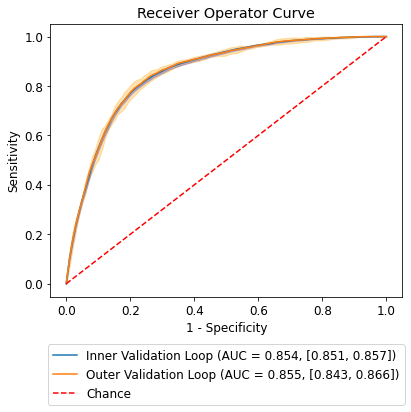

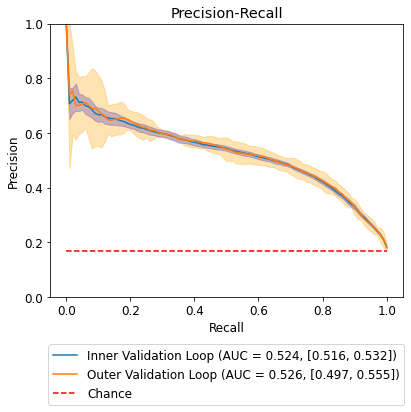

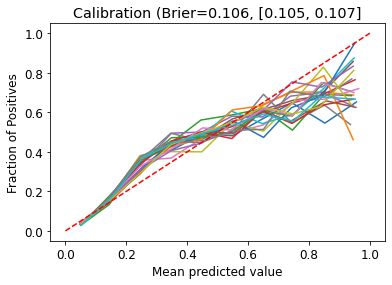

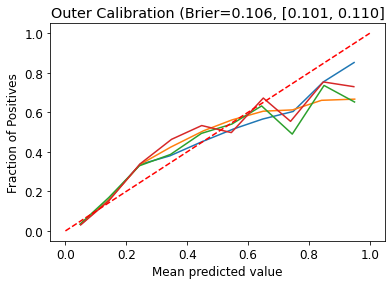

In [26]:
result_dict = lr_calibrated
name = "relative_{}hr_lead_{}hr_obs/mean_unpruned/lr_calibrated".format(lead, obs)
base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure(figsize=(6,6))
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'), loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure(figsize=(6,6))
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision, [0, 1], [pr_baseline, pr_baseline], 'r--')
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.ylim([0,1])
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap),
    'Chance'),
    loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()


mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

In [27]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

#lr_calibrated["oparam"] = {"C" : 0.025, "class_weight" : "balanced", "penalty": "l1", "solver": "liblinear"}

sel_ = SelectFromModel(LogisticRegression(**lr_calibrated["oparam"]))
sel_.fit(standard_data.iloc[:,1:], labels)

SelectFromModel(estimator=LogisticRegression(C=0.02, class_weight='balanced',
                                             penalty='l1', solver='liblinear'))

In [28]:
selected_feat = (data.iloc[:,1:]).columns[(sel_.get_support())]
print(len(selected_feat))
for i in range(len(selected_feat)):
    print(selected_feat[i])

with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned/lr_calibrated_selected_feats.pkl".format(lead, obs), "wb") as f:
    pickle.dump(selected_feat, f)

129
LOS
Age
APACHEIVscore
UrgentAdmission
NumBeds
TeachingStatus
Gender
AdmitHeight
HistAICD
HistAngina
HistArrythmia
HistCABG
HistHypertension
HistPacemaker
HistPulmEmb
HistHeartTransp
HistHypercalcemia
Histhyperthyroid
Histhypothyroid
HistSteroid Use
HistPUD
HistLiverTransp
HistAplasticAnemia
HistRadiationTherapy
HistCancer
HistOncology
HistMyeloproliferativeDisease
HistSickleCellDisease
HistImmuneSuppr
HistDementia
HistSeizures
HistStrokes
HistTIA
HistCOPD
HistRespiratoryFail
HistRestrictiveDis
HistLungTransp
HistStoneDisease
HistNeurogenicBladd
HistRheumatic
relative_0hr_lead_1hr_obsAdrenergicBronchodilators
relative_0hr_lead_1hr_obsaminoglycosides
relative_0hr_lead_1hr_obsAnticholinergicBronchodilators
relative_0hr_lead_1hr_obsAnticholinergics
relative_0hr_lead_1hr_obsAntidiarrheals
relative_0hr_lead_1hr_obsAntiemetics
relative_0hr_lead_1hr_obsAntihistamines
relative_0hr_lead_1hr_obsBarbiturates
relative_0hr_lead_1hr_obsBenzodiazepines
relative_0hr_lead_1hr_obsBetaBlockers
relativ

In [29]:
dropped_feat = (data.iloc[:,1:]).columns[np.logical_not(sel_.get_support())]
print(len(dropped_feat))
for i in range(len(dropped_feat)):
    print(dropped_feat[i])

with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned/lr_calibrated_dropped_feats.pkl".format(lead, obs), "wb") as f:
    pickle.dump(dropped_feat, f)

65
AdmitWeight
HistCHF
HistMI
HistPVD
HistPCI
HistValveDis
HistVenThromb
HistCushing
Histdiabetes
HistCirrhosis
HistHypersplenism
HistChemotherapy
HistClottingDisorder
HistHemolyticAnemia
HistHypercoagulableCondition
HistIntracranialMass
HistNeuromuscularDis
HistAsthma
HistSarcoidosis
HistRenalFail
HistRenalInsuff
HistRTA
HistRenalTransp
relative_0hr_lead_1hr_obsAcetaminophen
relative_0hr_lead_1hr_obsAnticoagulants
relative_0hr_lead_1hr_obsCalciumChannelBlockers
relative_0hr_lead_1hr_obsClassVAntiarrhythmics
relative_0hr_lead_1hr_obsColloidFluids
relative_0hr_lead_1hr_obsDiuretics
relative_0hr_lead_1hr_obsGlucocorticoids
relative_0hr_lead_1hr_obsInsulins
relative_0hr_lead_1hr_obsLaxatives
relative_0hr_lead_1hr_obsMethylxanthines
relative_0hr_lead_1hr_obsPotassiumChannelBlockers
relative_0hr_lead_1hr_obsSodiumChannelBlockers
relative_0hr_lead_1hr_obsSomatostatin
relative_0hr_lead_1hr_obsSulfonamides
relative_0hr_lead_1hr_obsTricyclicAntidepressants
relative_0hr_lead_1hr_obsVasodilators


In [20]:
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned/lr_calibrated_dropped_feats.pkl".format(lead, obs), "rb") as f:
    dropped_feat = pickle.load(f)

data_pruned = data.drop(labels=dropped_feat, axis=1)

In [31]:
# Coefficients
clf = LogisticRegression(**lr_calibrated["oparam"])
clf.fit(standard_data.iloc[:,1:], labels)
# Visualizing Coefficients
sorted_selected_feat = data.iloc[:,1:].columns[np.argsort(-np.abs(clf.coef_))]
sorted_coeff = clf.coef_[0][np.argsort(-np.abs(clf.coef_))]

C:\Users\Ryan\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


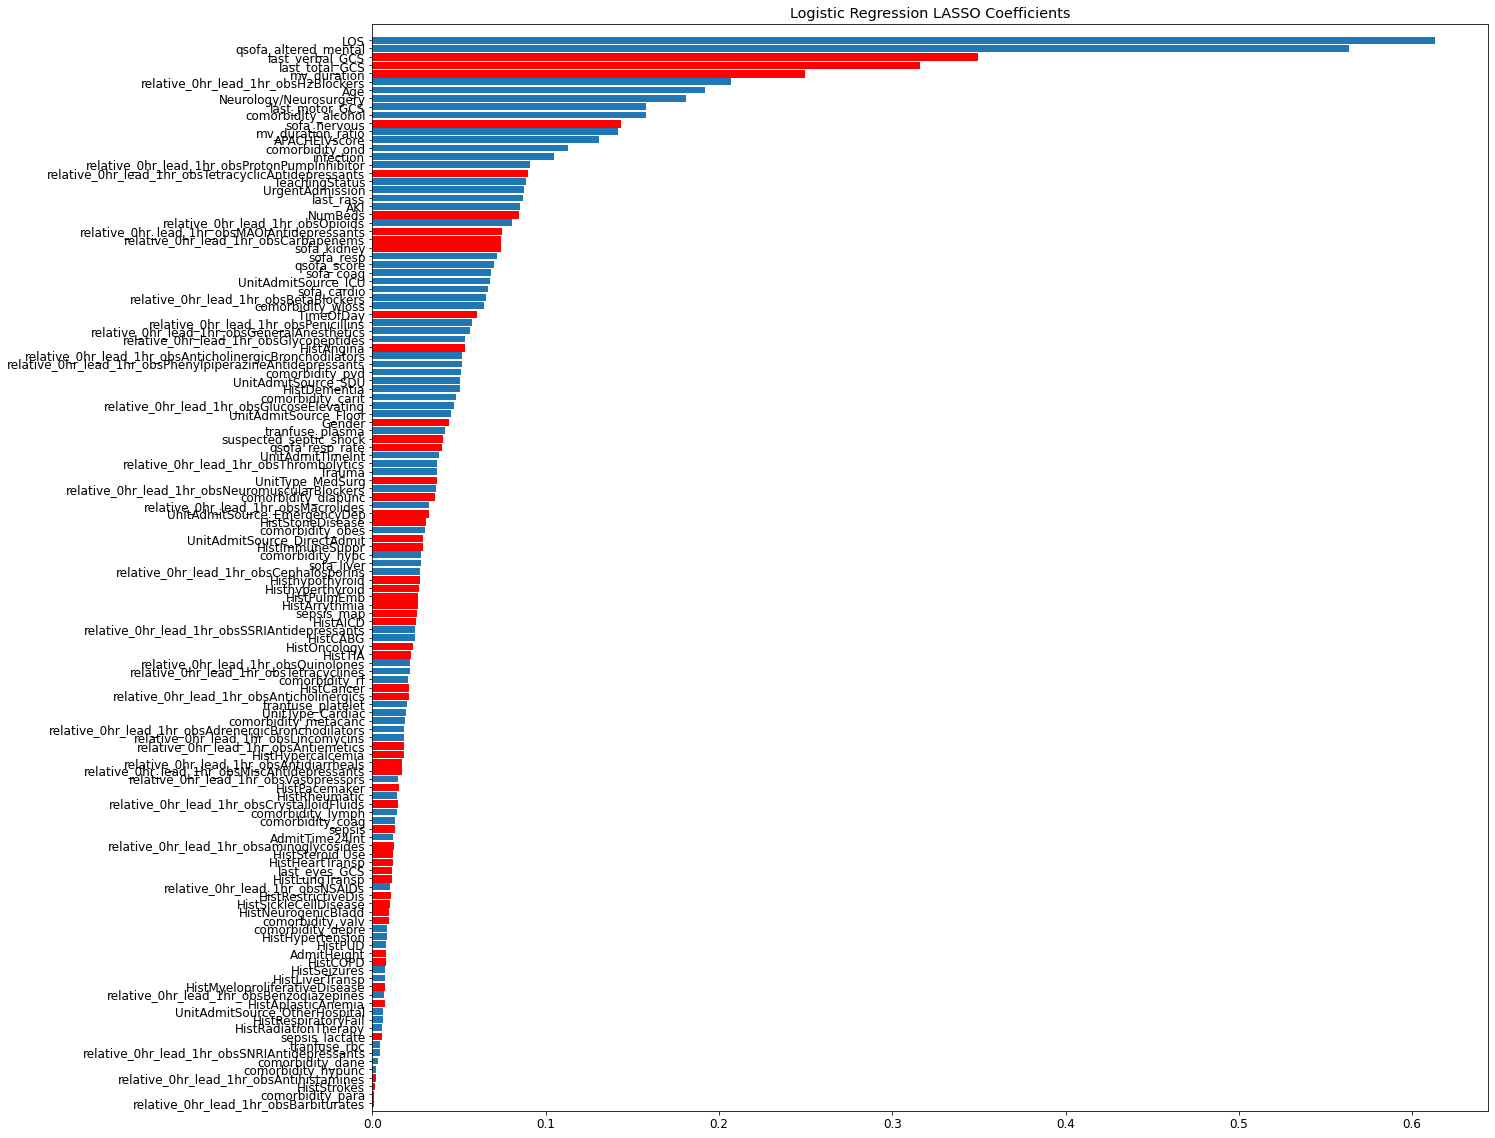

In [32]:
plt.figure(figsize=(20,20))
x = np.flip(np.arange(len(selected_feat)))
barlist = plt.barh(x, np.abs(sorted_coeff[0][:len(selected_feat)]))
plt.yticks(x, sorted_selected_feat[0][:len(selected_feat)])
plt.ylim(-1, len(selected_feat)+1)
temp = np.where(sorted_coeff[0][:len(selected_feat)] < 0)[0]
for i in temp:
    barlist[i].set_color('r')
plt.title("Logistic Regression LASSO Coefficients")
plt.show()

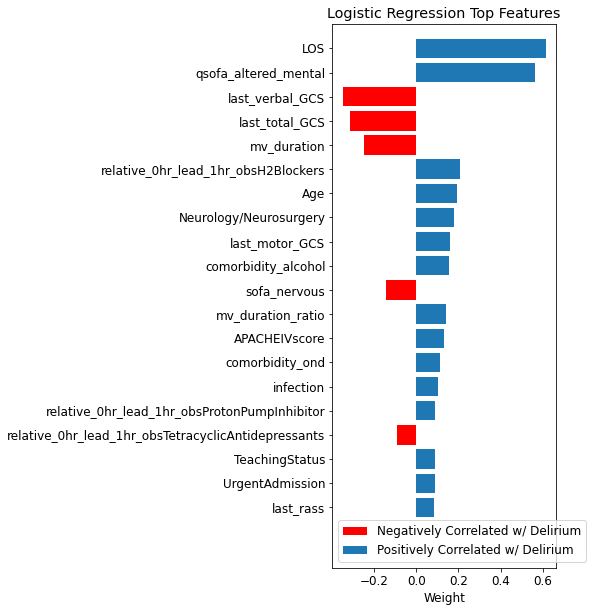

In [33]:
x = np.flip(np.arange(20))
plt.figure(figsize=(4,10))
temp = np.where(sorted_coeff[0][:20] < 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]), color='r')
temp = np.where(sorted_coeff[0][:20] >= 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]))

temp = sorted_selected_feat[0][:20]
temp_x = ["Mean Verbal GCS",
        "Min Bicarbonate",
        "APACHE IV Score",
        "Neurology Admission",
        "Max BUN",
        "Min RBC",
        "Precedex",
        "Max Potassium",
        "History of Dementia",
        "Age",
        "Adrenergic Bronchodilators",
        "Trauma Admission",
        "Min Chloride",
        "Anticoagulants",
        "General Anesthetics",
        "Stepdown Unit",
        "Haloperidol",
        "History of Angina",
        "Stepdown Unit",
        "ICU Admit Source",
        "Min MCH"]

plt.yticks(x, temp)
plt.ylim(-2.5, 20)

plt.title("Logistic Regression Top Features")
plt.legend(["Negatively Correlated w/ Delirium", "Positively Correlated w/ Delirium"])
#plt.tight_layout()
plt.xlabel("Weight")
plt.savefig('../figures/relative_{}hr_lead_{}hr_obs/mean_unpruned/lr_calibrated_coefficients_short.png'.format(lead, obs), dpi=500,bbox_inches = "tight")
plt.show()

# Random Forest

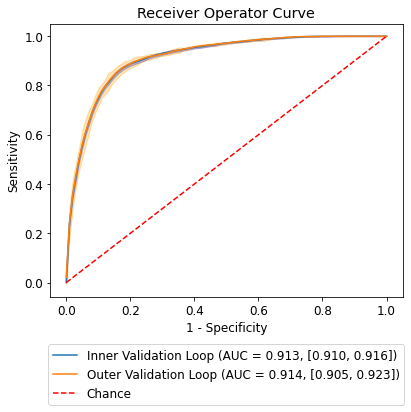

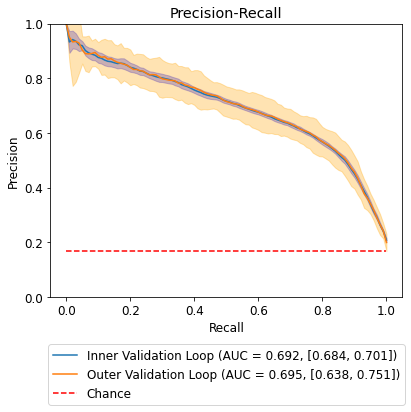

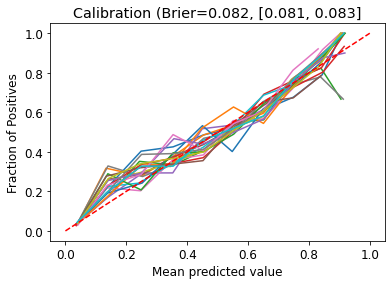

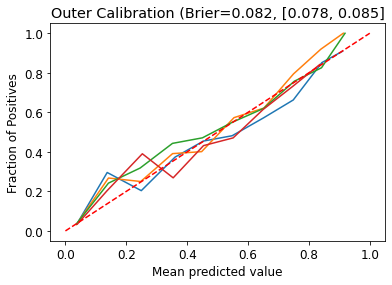

In [15]:
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_pruned/rf".format(lead, obs), "rb") as f:
    rf_result = pickle.load(f)

result_dict = rf_result
name = "/relative_{}hr_lead_{}hr_obs/mean_pruned/rf".format(lead, obs)
base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure(figsize=(6,6))
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'), loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])



plt.figure(figsize=(6,6))
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision, [0, 1], [pr_baseline, pr_baseline], 'r--')
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.ylim([0,1])
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap),
    'Chance'),
    loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()


mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

In [16]:
result_dict["oparam"]

{'ccp_alpha': 0.00030359443411635866,
 'max_depth': 80,
 'max_samples': 0.643973477931626,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 250}

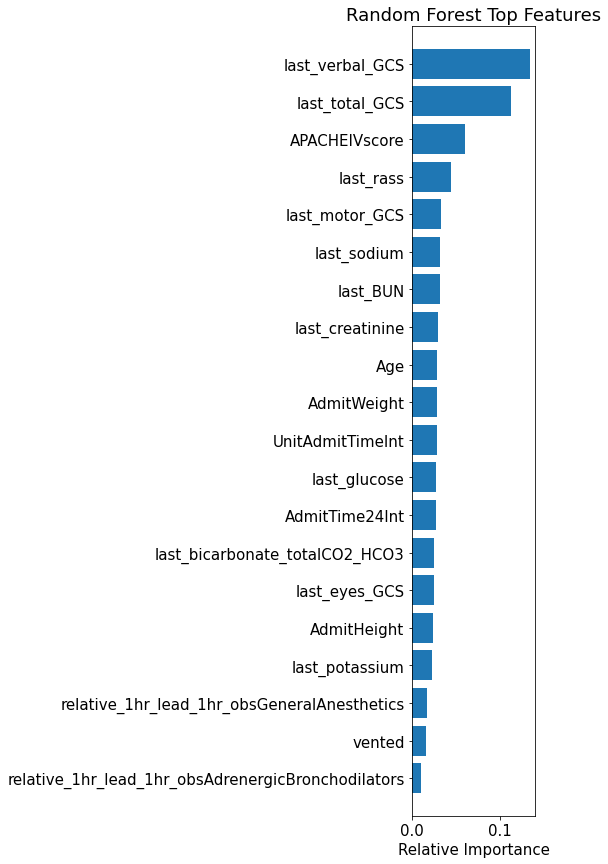

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_result["oparam"])
clf.fit(data_pruned.iloc[:,1:], labels)

importances = clf.feature_importances_
sorted_selected_feat = data_pruned.iloc[:,1:].columns[np.argsort(-np.abs(importances))]
sorted_coeff = importances[np.argsort(-np.abs(importances))]
random_forest_sorted_selected_feat = np.copy(sorted_selected_feat)

num_features=20
x = np.flip(np.arange(len(sorted_selected_feat[:num_features])))

plt.figure(figsize=(8,12))
plt.rcParams.update({'font.size': 15})
barlist = plt.barh(x, np.abs(sorted_coeff[:num_features]))
temp = sorted_selected_feat[:20]
temp_x = ["Mean Verbal GCS",
"Mean Total GCS",
"APACHE IV Score",
"Mean Motor GCS",
"Mean Eyes GCS",
"Admit Weight",
"Mean Sodium",
"Age",
"Min Sodium",
"Unit Admit Time",
"Admit Time",
"Max RBC",
"Mean Bicarbonate",
"Admit Height",
"Max Sodium",
"Min Bicarbonate",
"Mean BUN",
"Mean RBC",
"Min BUN",
"Min Glucose"
]
plt.yticks(x, temp)
plt.ylim(-1, num_features)
plt.title("Random Forest Top Features")
plt.tight_layout()
plt.xlabel("Relative Importance")
plt.savefig("../figures/{}_feature_importance.png".format(name), bbox_inches = "tight")
plt.show()

# CatBoost

In [34]:
catboost_result = run_parallel_cross_validation(data, 
												"CatBoostClassifier",
												{"n_estimators": 3000},
												"from catboost import CatBoostClassifier",
												run_once = True,
												bayes=False,
												calibrate=True,
												n_jobs=2,
												run_id=5,
												outer_tuning=True,
												outer_labels=labels)

Inner Validation Complete


In [35]:
import pickle
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned/catboost".format(lead, obs), "wb") as f:
    pickle.dump(catboost_result, f)

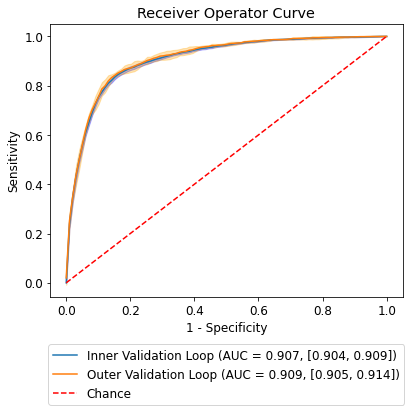

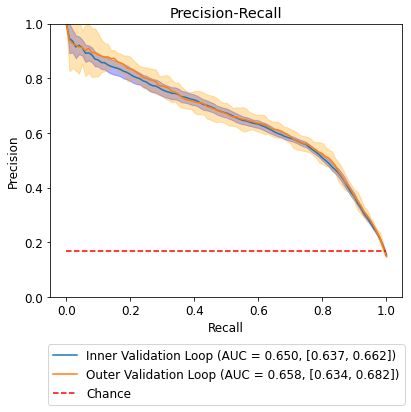

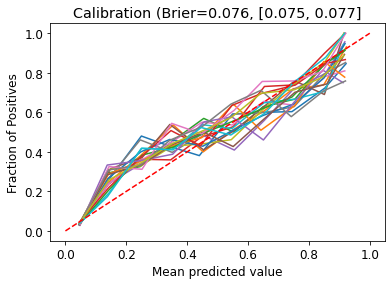

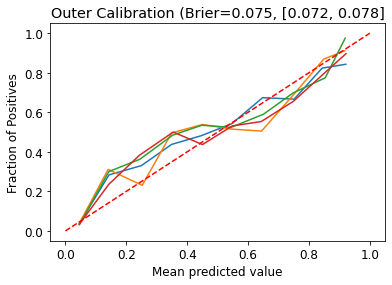

In [36]:
# with open("../pickle/relative_1hr_lead_1hr_obs/mean_unpruned/catboost", "rb") as f:
#     catboost_result = pickle.load(f)

result_dict = catboost_result
name = "/relative_{}hr_lead_{}hr_obs/mean_unpruned/catboost".format(lead, obs)

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure(figsize=(6,6))
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'), loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])



plt.figure(figsize=(6,6))
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision, [0, 1], [pr_baseline, pr_baseline], 'r--')
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.ylim([0,1])
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap),
    'Chance'),
    loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()


mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()


 1m 20s	remaining: 11.3s
2631:	learn: 0.1934938	total: 1m 20s	remaining: 11.3s
2632:	learn: 0.1934534	total: 1m 20s	remaining: 11.2s
2633:	learn: 0.1934361	total: 1m 20s	remaining: 11.2s
2634:	learn: 0.1933894	total: 1m 20s	remaining: 11.2s
2635:	learn: 0.1933605	total: 1m 20s	remaining: 11.2s
2636:	learn: 0.1933169	total: 1m 20s	remaining: 11.1s
2637:	learn: 0.1932703	total: 1m 20s	remaining: 11.1s
2638:	learn: 0.1932445	total: 1m 20s	remaining: 11.1s
2639:	learn: 0.1932157	total: 1m 20s	remaining: 11s
2640:	learn: 0.1932018	total: 1m 20s	remaining: 11s
2641:	learn: 0.1931790	total: 1m 20s	remaining: 11s
2642:	learn: 0.1931482	total: 1m 21s	remaining: 10.9s
2643:	learn: 0.1931096	total: 1m 21s	remaining: 10.9s
2644:	learn: 0.1930766	total: 1m 21s	remaining: 10.9s
2645:	learn: 0.1930391	total: 1m 21s	remaining: 10.8s
2646:	learn: 0.1930048	total: 1m 21s	remaining: 10.8s
2647:	learn: 0.1929802	total: 1m 21s	remaining: 10.8s
2648:	learn: 0.1929512	total: 1m 21s	remaining: 10.8s
2649:	lea

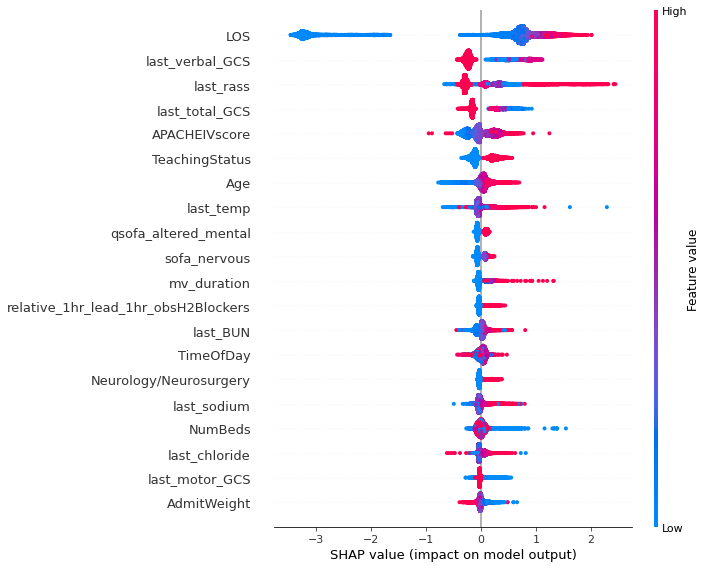

In [47]:
import shap
from catboost import CatBoostClassifier
clf = CatBoostClassifier(**{"n_estimators": 3000})
clf.fit(data.iloc[:,1:], labels)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(data.iloc[:, 1:])
shap.summary_plot(shap_values, data.iloc[:, 1:], show=False)
plt.savefig("../figures/{}_shapley_plot_full.png".format(name), bbox_inches="tight")

In [15]:
catboost_result = run_parallel_cross_validation(data_pruned, 
												"CatBoostClassifier",
												{"n_estimators": 3000},
												"from catboost import CatBoostClassifier",
												run_once = True,
												bayes=False,
												calibrate=True,
												n_jobs=2,
												run_id=5,
												outer_tuning=True,
												outer_labels=labels)

Inner Validation Complete


In [19]:
import pickle
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_pruned/catboost_unbalanced".format(lead, obs), "wb") as f:
    pickle.dump(catboost_result, f)

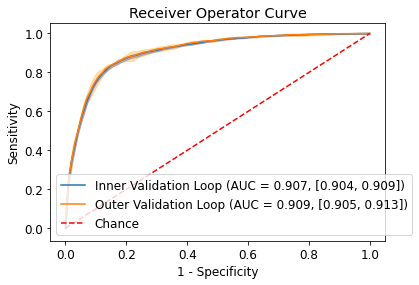

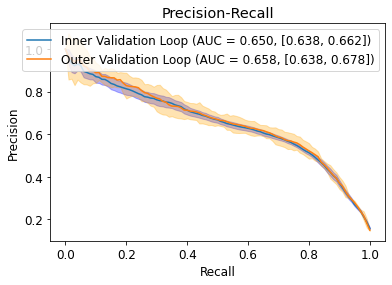

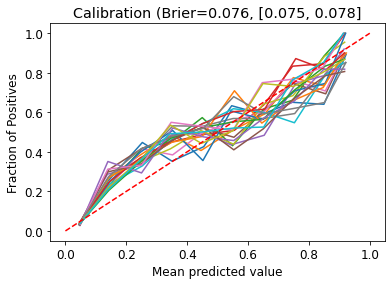

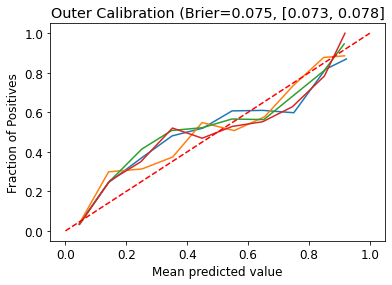

In [21]:
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_pruned/catboost_unbalanced".format(lead, obs), "rb") as f:
    catboost_result = pickle.load(f)

result_dict = catboost_result
name = "/relative_{}hr_lead_{}hr_obs/mean_pruned/catboost".format(lead, obs)

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

Outer Loop 0
Threshold: 0.07078435343834874
Specificity: 0.839902147322642
Sensitivity: 0.8404605263157895
PPV: 0.46454545454545454
NPV: 0.9695638531534359
Outer Loop 1
Threshold: 0.0757173332113545
Specificity: 0.8415196743554952
Sensitivity: 0.8391167192429022
PPV: 0.4767025089605735
NPV: 0.9681548548236029
Outer Loop 2
Threshold: 0.07825361420622302
Specificity: 0.8444203095302742
Sensitivity: 0.8449111470113085
PPV: 0.4771897810218978
NPV: 0.9700561447286338
Outer Loop 3
Threshold: 0.07321795992644906
Specificity: 0.844551282051282
Sensitivity: 0.8469565217391304
PPV: 0.45556594948550044
NPV: 0.9729230769230769


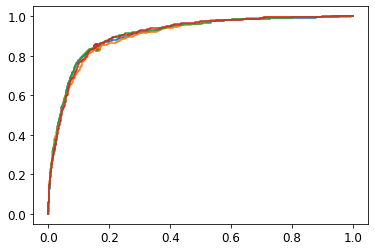

Average Specificity: (0.8425983533149234, 0.8462230057641537, 0.8389737008656931)
Average Sensitivity: (0.8428612285772827, 0.8487263710045692, 0.8369960861499963)
Average PPV: (0.4685009235033566, 0.4850812737059685, 0.4519205733007447)
Average NPV: (0.9701744824071873, 0.9733596510963267, 0.9669893137180479)


In [22]:
from sklearn import metrics

total_spec = np.zeros(4)
total_sens = np.zeros(4)
total_ppv = np.zeros(4)
total_npv = np.zeros(4)


plt.figure()
for i in range(4):
    print("Outer Loop {}".format(i))
    fpr, tpr, thresholds = metrics.roc_curve(result_dict["olabels"][i], result_dict["ofullpred"][i])
    operating_point = np.argmin(abs(tpr-(1-fpr)))
    print("Threshold: {}".format(thresholds[operating_point]))
    plt.plot(fpr, tpr)
    plt.scatter(fpr[operating_point], tpr[operating_point])

    print("Specificity: {}".format(1-fpr[operating_point]))
    total_spec[i] = 1-fpr[operating_point]
    print("Sensitivity: {}".format(tpr[operating_point]))
    total_sens[i] = tpr[operating_point]



    tn, fp, fn, tp = metrics.confusion_matrix(result_dict["olabels"][i],  result_dict["ofullpred"][i] >= thresholds[operating_point]).ravel()
    print("PPV: {}".format(tp/(tp+fp)))
    print("NPV: {}".format(tn/(tn+fn)))

    total_ppv[i] = tp/(tp+fp)
    total_npv[i] = tn/(tn+fn)

#plt.xlim([0.2, 0.3])
plt.show()

print("Average Specificity: {}".format(compute_confidence(total_spec)))
print("Average Sensitivity: {}".format(compute_confidence(total_sens)))
print("Average PPV: {}".format(compute_confidence(total_ppv)))
print("Average NPV: {}".format(compute_confidence(total_npv)))

Learning rate set to 0.014184
0:	learn: 0.6706131	total: 565ms	remaining: 28m 14s
1:	learn: 0.6501794	total: 941ms	remaining: 23m 29s
2:	learn: 0.6330521	total: 1.31s	remaining: 21m 45s
3:	learn: 0.6169671	total: 1.7s	remaining: 21m 13s
4:	learn: 0.5990582	total: 2.12s	remaining: 21m 12s
5:	learn: 0.5874156	total: 2.54s	remaining: 21m 9s
6:	learn: 0.5714929	total: 2.92s	remaining: 20m 48s
7:	learn: 0.5561768	total: 3.31s	remaining: 20m 39s
8:	learn: 0.5422729	total: 3.68s	remaining: 20m 23s
9:	learn: 0.5321663	total: 4.08s	remaining: 20m 20s
10:	learn: 0.5234205	total: 4.45s	remaining: 20m 10s
11:	learn: 0.5131010	total: 4.83s	remaining: 20m 1s
12:	learn: 0.5003720	total: 5.18s	remaining: 19m 50s
13:	learn: 0.4895586	total: 5.53s	remaining: 19m 40s
14:	learn: 0.4804068	total: 5.88s	remaining: 19m 30s
15:	learn: 0.4727482	total: 6.26s	remaining: 19m 27s
16:	learn: 0.4642688	total: 6.62s	remaining: 19m 21s
17:	learn: 0.4548883	total: 6.97s	remaining: 19m 14s
18:	learn: 0.4482237	total: 7

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


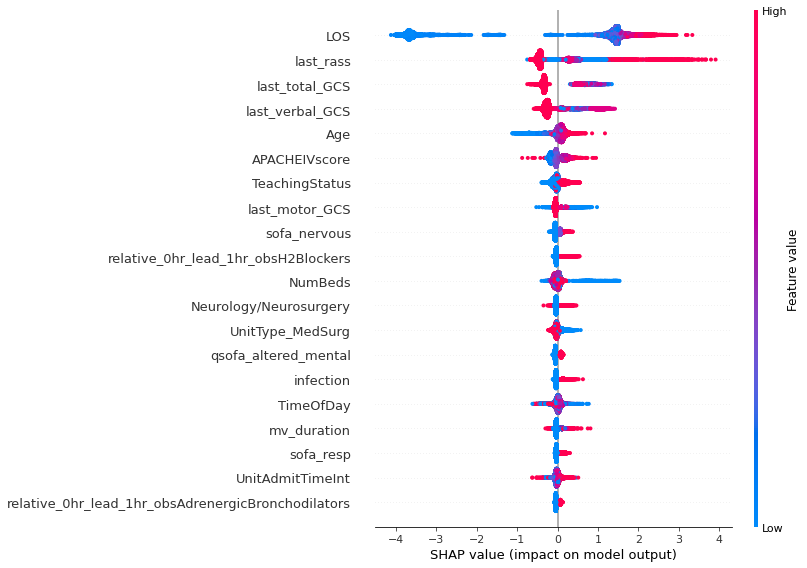

In [23]:
import shap
from catboost import CatBoostClassifier
clf = CatBoostClassifier(**{"n_estimators": 3000})
clf.fit(data_pruned.iloc[:,1:], labels)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(data_pruned.iloc[:, 1:])
shap.summary_plot(shap_values, data_pruned.iloc[:, 1:], show=False)
plt.savefig("../figures/{}_shapley_plot_full.png".format(name), bbox_inches="tight")

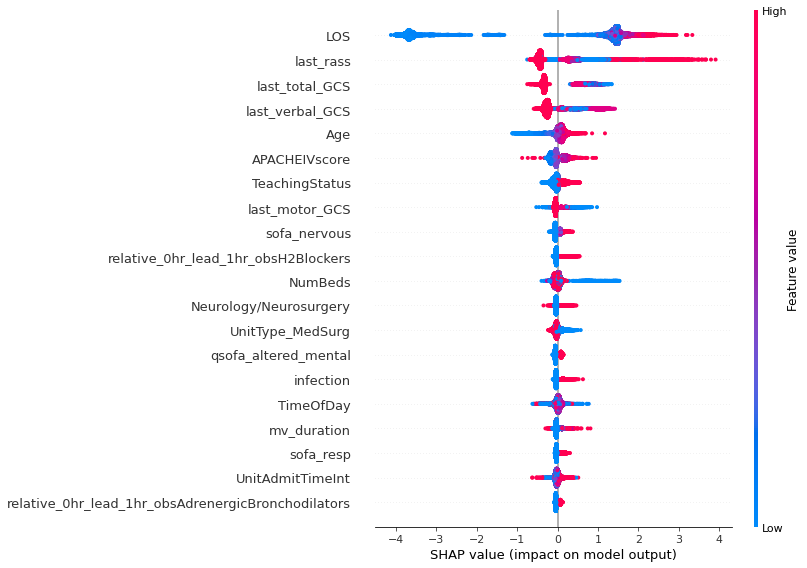

In [25]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(data_pruned.iloc[:, 1:])
shap.summary_plot(shap_values, data_pruned.iloc[:, 1:], show=False)
plt.savefig("../figures/{}_shapley_plot_full.png".format(name), bbox_inches="tight")

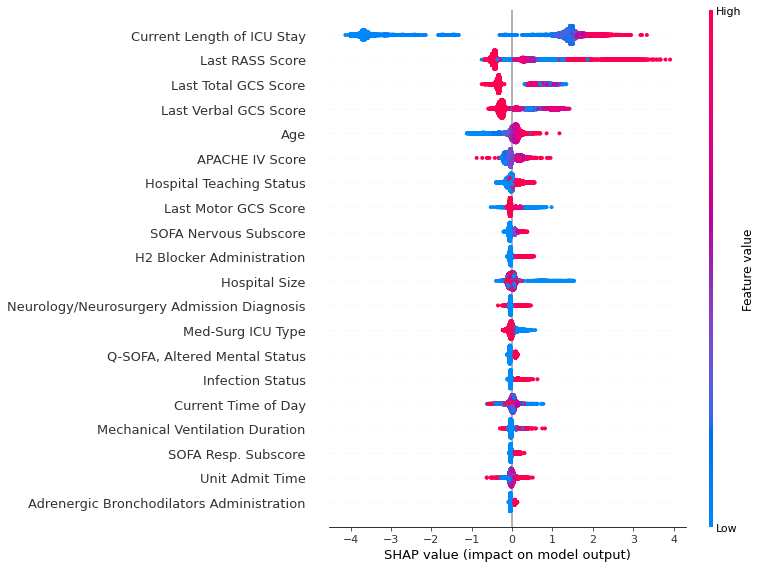

In [31]:
shap.summary_plot(shap_values, data_pruned.iloc[:, 1:], show=False)
plt.yticks(np.arange(0, 20),
["Adrenergic Bronchodilators Administration",
"Unit Admit Time",
"SOFA Resp. Subscore",
"Mechanical Ventilation Duration",
"Current Time of Day",
"Infection Status",
"Q-SOFA, Altered Mental Status",
"Med-Surg ICU Type",
"Neurology/Neurosurgery Admission Diagnosis",
"Hospital Size",
"H2 Blocker Administration",
"SOFA Nervous Subscore",
"Last Motor GCS Score",
"Hospital Teaching Status", 
"APACHE IV Score",
"Age",
"Last Verbal GCS Score",
"Last Total GCS Score",
"Last RASS Score", "Current Length of ICU Stay"])
plt.savefig("../figures/{}_shapley_plot_full.png".format(name), bbox_inches="tight")

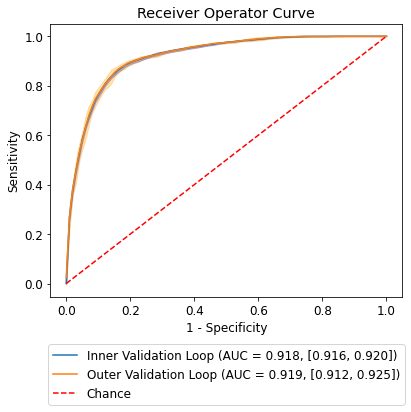

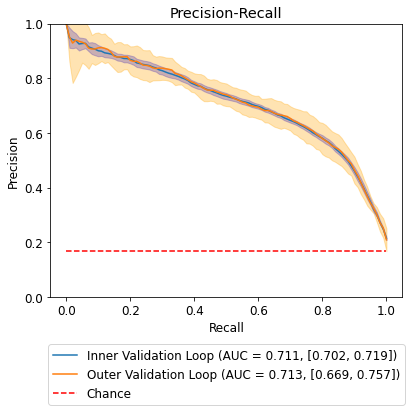

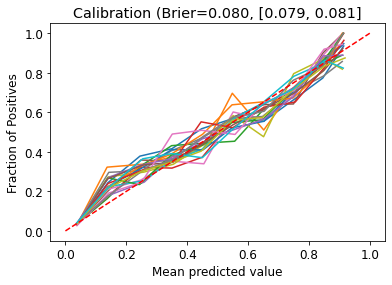

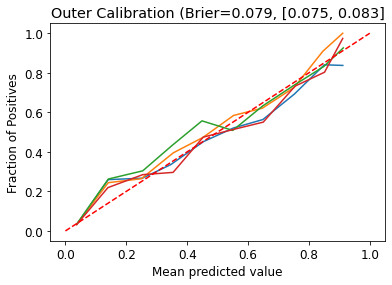

In [16]:
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_pruned/stacked".format(lead, obs), "rb") as f:
    rf_result = pickle.load(f)

result_dict = rf_result
name = "/relative_{}hr_lead_{}hr_obs/mean_pruned/stacked".format(lead, obs)
base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure(figsize=(6,6))
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'), loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])



plt.figure(figsize=(6,6))
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision, [0, 1], [pr_baseline, pr_baseline], 'r--')
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.ylim([0,1])
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap),
    'Chance'),
    loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()


mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()